In [2]:
import numpy as np
import urllib.request
import feedparser
import pandas as pd
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk import download
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
               
download('punkt')
download('stopwords')
               
stop_words = stopwords.words('english')

%matplotlib inline

[nltk_data] Downloading package punkt to /Users/jayadeep/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jayadeep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

## Part I: Data Extraction

In [4]:
search_term = "machine+learning"
max_results = 1000

In [5]:
url = "http://export.arxiv.org/api/query?search_query=all:"+search_term+"&start=0&max_results="+str(max_results)

In [6]:
data = urllib.request.urlopen(url).read()
# print(data)
d = feedparser.parse(data)

In [7]:
d['feed']

{'links': [{'href': 'http://arxiv.org/api/query?search_query%3Dall%3Amachine%20learning%26id_list%3D%26start%3D0%26max_results%3D1000',
   'rel': 'self',
   'type': 'application/atom+xml'}],
 'title': 'ArXiv Query: search_query=all:machine learning&id_list=&start=0&max_results=1000',
 'title_detail': {'type': 'text/html',
  'language': None,
  'base': '',
  'value': 'ArXiv Query: search_query=all:machine learning&id_list=&start=0&max_results=1000'},
 'id': 'http://arxiv.org/api/cJ94CoIB99FKowsEQVatCUfLlTs',
 'guidislink': True,
 'link': 'http://arxiv.org/api/cJ94CoIB99FKowsEQVatCUfLlTs',
 'updated': '2019-04-13T00:00:00-04:00',
 'updated_parsed': time.struct_time(tm_year=2019, tm_mon=4, tm_mday=13, tm_hour=4, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=103, tm_isdst=0),
 'opensearch_totalresults': '77475',
 'opensearch_startindex': '0',
 'opensearch_itemsperpage': '1000'}

In [8]:
len(d['entries'])

1000

In [9]:
d['entries'][0]['title']

'An Optimal Control View of Adversarial Machine Learning'

In [10]:
d['entries'][0]['summary']

"I describe an optimal control view of adversarial machine learning, where the\ndynamical system is the machine learner, the input are adversarial actions, and\nthe control costs are defined by the adversary's goals to do harm and be hard\nto detect. This view encompasses many types of adversarial machine learning,\nincluding test-item attacks, training-data poisoning, and adversarial reward\nshaping. The view encourages adversarial machine learning researcher to utilize\nadvances in control theory and reinforcement learning."

In [11]:
df = pd.DataFrame(d['entries'], columns=['title', 'summary'])

## Part II: Preprocess data

In [13]:
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), " ") for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens if item not in stop_words]

'''remove punctuation, lowercase, remove stopwords, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

In [85]:
df['title_proc'] = df['title'].apply(lambda x: normalize(x))
df['summary_proc'] = df['summary'].apply(lambda x: normalize(x))

In [15]:
df.loc[:10, ['title', 'title_proc']]

,title,title_proc
0,An Optimal Control View of Adversarial Machine Learning,"[optim, control, view, adversari, machin, learn]"
1,Minimax deviation strategies for machine learning and recognition with\n short learning samples,"[minimax, deviat, strategi, machin, learn, recognit, short, learn, sampl]"
2,Introduction to Machine Learning: Class Notes 67577,"[introduct, machin, learn, class, note, 67577]"
3,A Unified Analytical Framework for Trustable Machine Learning and\n Automation Running with Blockchain,"[unifi, analyt, framework, trustabl, machin, learn, autom, run, blockchain]"
4,MLBench: How Good Are Machine Learning Clouds for Binary Classification\n Tasks on Structured Data?,"[mlbench, good, machin, learn, cloud, binari, classif, task, structur, data]"
5,AutoCompete: A Framework for Machine Learning Competition,"[autocompet, framework, machin, learn, competit]"
6,Proceedings of the 2016 ICML Workshop on #Data4Good: Machine Learning in\n Social Good Applications,"[proceed, 2016, icml, workshop, data4good, machin, learn, social, good, applic]"
7,Joint Training of Deep Boltzmann Machines,"[joint, train, deep, boltzmann, machin]"
8,A Primer on PAC-Bayesian Learning,"[primer, pac, bayesian, learn]"
9,Temporal-related Convolutional-Restricted-Boltzmann-Machine capable of\n learning relational order via reinforcement learning procedure?,"[tempor, relat, convolut, restrict, boltzmann, machin, capabl, learn, relat, order, via, reinforc, learn, procedur]"


In [89]:
df.loc[:3, ['summary', 'summary_proc']]

,summary,summary_proc
0,"I describe an optimal control view of adversarial machine learning, where the\ndynamical system is the machine learner, the input are adversarial actions, and\nthe control costs are defined by the adversary's goals to do harm and be hard\nto detect. This view encompasses many types of adversarial machine learning,\nincluding test-item attacks, training-data poisoning, and adversarial reward\nshaping. The view encourages adversarial machine learning researcher to utilize\nadvances in control theory and reinforcement learning.","[describ, optim, control, view, adversari, machin, learn, dynam, system, machin, learner, input, adversari, action, control, cost, defin, adversari, goal, harm, hard, detect, view, encompass, mani, type, adversari, machin, learn, includ, test, item, attack, train, data, poison, adversari, reward, shape, view, encourag, adversari, machin, learn, research, util, advanc, control, theori, reinforc, learn]"
1,The article is devoted to the problem of small learning samples in machine\nlearning. The flaws of maximum likelihood learning and minimax learning are\nlooked into and the concept of minimax deviation learning is introduced that is\nfree of those flaws.,"[articl, devot, problem, small, learn, sampl, machin, learn, flaw, maximum, likelihood, learn, minimax, learn, look, concept, minimax, deviat, learn, introduc, free, flaw]"
2,"Introduction to Machine learning covering Statistical Inference (Bayes, EM,\nML/MaxEnt duality), algebraic and spectral methods (PCA, LDA, CCA, Clustering),\nand PAC learning (the Formal model, VC dimension, Double Sampling theorem).","[introduct, machin, learn, cover, statist, infer, bay, em, ml, maxent, dualiti, algebra, spectral, method, pca, lda, cca, cluster, pac, learn, formal, model, vc, dimens, doubl, sampl, theorem]"
3,"Traditional machine learning algorithms use data from databases that are\nmutable, and therefore the data cannot be fully trusted. Also, the machine\nlearning process is difficult to automate. This paper proposes building a\ntrustable machine learning system by using blockchain technology, which can\nstore data in a permanent and immutable way. In addition, smart contracts are\nused to automate the machine learning process. This paper makes three\ncontributions. First, it establishes a link between machine learning technology\nand blockchain technology. Previously, machine learning and blockchain have\nbeen considered two independent technologies without an obvious link. Second,\nit proposes a unified analytical framework for trustable machine learning by\nusing blockchain technology. This unified framework solves both the\ntrustability and automation issues in machine learning. Third, it enables a\ncomputer to translate core machine learning implementation from a single thread\non a single machine to multiple threads on multiple machines running with\nblockchain by using a unified approach. The paper uses association rule mining\nas an example to demonstrate how trustable machine learning can be implemented\nwith blockchain, and it shows how this approach can be used to analyze opioid\nprescriptions to help combat the opioid crisis.","[tradit, machin, learn, algorithm, use, data, databas, mutabl, therefor, data, fulli, trust, also, machin, learn, process, difficult, autom, paper, propos, build, trustabl, machin, learn, system, use, blockchain, technolog, store, data, perman, immut, way, addit, smart, contract, use, autom, machin, learn, process, paper, make, three, contribut, first, establish, link, machin, learn, technolog, blockchain, technolog, previous, machin, learn, blockchain, consid, two, independ, technolog, without, obviou, link, second, propos, unifi, analyt, framework, trustabl, machin, learn, use, blockchain, technolog, unifi, framework, solv, trustabl, autom, issu, machin, learn, third, enabl, comput, translat, core, machin, learn, implement, singl, thread, singl, machin, multipl, thread, multipl, machin, run, ...]"


## Part III: compute similarities

### First method: Latent Semantic Indexing

In [90]:
from gensim import corpora, models, similarities, matutils
from gensim.models import TfidfModel
from gensim.models import LsiModel
from gensim.similarities import MatrixSimilarity
import itertools

#### 1. Creating the dictionary

In [92]:
dictionary = corpora.Dictionary(df['summary_proc'])
list(itertools.islice(dictionary.token2id.items(), 0, 10))

[('action', 0),
 ('advanc', 1),
 ('adversari', 2),
 ('attack', 3),
 ('control', 4),
 ('cost', 5),
 ('data', 6),
 ('defin', 7),
 ('describ', 8),
 ('detect', 9)]

#### 2. Creating the corpus

In [93]:
corpus_gensim = [dictionary.doc2bow(doc) for doc in df['summary_proc']]
print(corpus_gensim[3][:20])

[(6, 3), (19, 10), (21, 12), (29, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 3), (81, 6), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1)]


In [94]:
dictionary[6]

'data'

In [102]:
np.sum(np.array(df.loc[3, 'summary_proc']) == 'data')

3

#### 3. Creating the tf-idf transformation

In [103]:
tfidf = TfidfModel(corpus_gensim)
corpus_tfidf = tfidf[corpus_gensim]

In [104]:
print(corpus_tfidf[3][:20])

[(6, 0.03760992074903925), (19, 0.006444880957719298), (21, 0.05730151180186316), (29, 0.02873624342577056), (73, 0.04244142355528707), (74, 0.013771255346576328), (75, 0.02556810144947738), (76, 0.05823916550021682), (77, 0.04389979191506502), (78, 0.0398580586042844), (79, 0.05644995873929763), (80, 0.149031229556138), (81, 0.588688669388792), (82, 0.04468281681442817), (83, 0.10905802369849178), (84, 0.02509678985386338), (85, 0.038733831051686235), (86, 0.0836485945993543), (87, 0.05484303738209147), (88, 0.060257368852324765)]


#### 4. Choice of the number of topics

LSA seeks to identify a set of topics related to the research papers. The number of these topics N is equal to the dimension of the approximation matrix resulting from the SVD dimension reduction technique. This number is a hyper-parameter to be carefully adjusted. It results from the selection of the N largest singular values of the tf-idf corpus matrix. These singular values can be calculated as follows:

In [105]:
len(dictionary)

4780

In [106]:
numpy_matrix = matutils.corpus2dense(corpus_gensim, num_terms=4780)
s = np.linalg.svd(numpy_matrix, full_matrices=False, compute_uv=False)

A histogram of the singular values of the tf-idf corpus matrix is presented in the following figure.

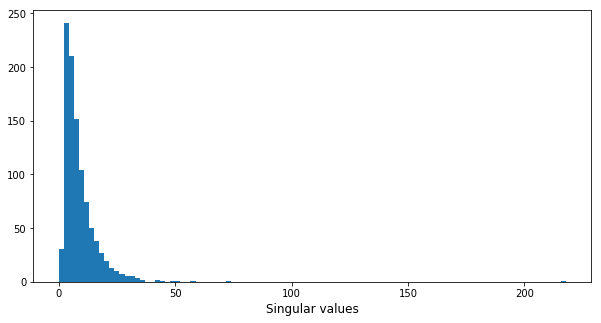

In [107]:
plt.figure(figsize=(10,5))
plt.hist(s, bins=100)
plt.xlabel('Singular values', fontsize=12)
plt.show()

#### 5. Creating the LSA model

The "LsiModel" function transforms our tf-idf corpus into a latent 30-dimensional space (number of topics = 30).

In [108]:
lsi = LsiModel(corpus_tfidf, id2word=dictionary, num_topics=100)

transform corpus to LSI space and index it

In [109]:
lsi_index = MatrixSimilarity(lsi[corpus_tfidf])

#### 6. Performing queries

In [174]:
ind = 231
query = df.loc[ind,'summary']
print("Title:", df.loc[ind, 'title'])
print('Summary (query):\n', query)

Title: Probabilistic Matrix Factorization for Automated Machine Learning
Summary (query):
 In order to achieve state-of-the-art performance, modern machine learning
techniques require careful data pre-processing and hyperparameter tuning.
Moreover, given the ever increasing number of machine learning models being
developed, model selection is becoming increasingly important. Automating the
selection and tuning of machine learning pipelines consisting of data
pre-processing methods and machine learning models, has long been one of the
goals of the machine learning community. In this paper, we tackle this
meta-learning task by combining ideas from collaborative filtering and Bayesian
optimization. Using probabilistic matrix factorization techniques and
acquisition functions from Bayesian optimization, we exploit experiments
performed in hundreds of different datasets to guide the exploration of the
space of possible pipelines. In our experiments, we show that our approach
quickly identif

In [175]:
vec_bow = dictionary.doc2bow(normalize(query))
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi[:10])

[(0, 4.995613522153284), (1, 0.1829264382072413), (2, 0.021034898063821347), (3, 0.9066609829769622), (4, -0.12905670338915354), (5, -0.010944198466460766), (6, 2.4831105809496443), (7, 0.36727352437158334), (8, -0.07474665571769505), (9, 1.2207189460025565)]


To obtain similarities of our query document against the nine indexed documents:

In [176]:
sims = lsi_index[vec_lsi]  # perform a similarity query against the corpus
print(list(enumerate(sims))[:10])  # print (document_number, document_similarity) 2-tuples

[(0, 0.09011151), (1, 0.06725474), (2, 0.061150942), (3, 0.2757017), (4, 0.24603274), (5, 0.4109326), (6, 0.014472662), (7, 0.1596373), (8, 0.19599408), (9, 0.15042636)]


In [172]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims[:10])  # print sorted (document number, similarity score) 2-tuples

[(189, 0.9593725), (469, 0.5058179), (38, 0.49048483), (232, 0.48997682), (370, 0.48388204), (163, 0.4835888), (544, 0.4776815), (521, 0.47179198), (604, 0.4696668), (19, 0.465696)]


In [173]:
for i in range(5):
    ind, score = sims[i]
    print(df.loc[ind, 'title'])
    print(ind, df.loc[ind,'summary'], score)
    print("\n")

Training Humans and Machines
189 For many years, researchers in psychology, education, statistics, and machine
learning have been developing practical methods to improve learning speed,
retention, and generalizability, and this work has been successful. Many of
these methods are rooted in common underlying principles that seem to drive
learning and overlearning in both humans and machines. I present a review of a
small part of this work to point to potentially novel applications in both
machine and human learning that may be worth exploring. 0.9593725


Using Human Brain Activity to Guide Machine Learning
469 Machine learning is a field of computer science that builds algorithms that
learn. In many cases, machine learning algorithms are used to recreate a human
ability like adding a caption to a photo, driving a car, or playing a game.
While the human brain has long served as a source of inspiration for machine
learning, little effort has been made to directly use data collected from
w